In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy

In [2]:
data = pd.read_csv('hipparcos-voidmain.csv')

In [3]:
data.iloc[-5:]

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
118213,H,118318,NaN,23 59 51.30,+11 40 25.4,6.99,1.0,H,359.963744,11.673709,...,S,NaN,NaN,224673.0,B+10 5018,NaN,NaN,1.56,K2,S
118214,H,118319,NaN,23 59 53.74,-22 25 41.4,8.23,NaN,G,359.973913,-22.428180,...,S,NaN,NaN,224693.0,NaN,C-23 18108,P-23 8366,0.70,G2V,4
118215,H,118320,NaN,23 59 54.25,+05 57 23.9,7.59,NaN,H,359.976057,5.956638,...,S,NaN,NaN,224689.0,B+05 5245,NaN,NaN,0.98,K0,S
118216,H,118321,NaN,23 59 54.78,-64 22 21.3,9.20,NaN,G,359.978239,-64.372572,...,NaN,NaN,NaN,224685.0,NaN,C-65 2958,P-65 4188,0.75,G5V,1
118217,H,118322,NaN,23 59 54.91,-65 34 37.5,4.49,NaN,H,359.978792,-65.577078,...,S,NaN,NaN,224686.0,NaN,NaN,P-66 3819,-0.04,B9IV,X


In [4]:
data[data.columns[0:3]]

,Catalog,HIP,Proxy
0,H,1,NaN
1,H,2,NaN
2,H,3,NaN
3,H,4,NaN
4,H,5,NaN
...,...,...,...
118213,H,118318,NaN
118214,H,118319,NaN
118215,H,118320,NaN
118216,H,118321,NaN


In [5]:
data_new=data[['HIP','RAhms','DEdms','Vmag','Plx','SpType','B-V']]
data_new

,HIP,RAhms,DEdms,Vmag,Plx,SpType,B-V
0,1,00 00 00.22,+01 05 20.4,9.10,3.54,F5,0.482
1,2,00 00 00.91,-19 29 55.8,9.27,21.90,K3V,0.999
2,3,00 00 01.20,+38 51 33.4,6.61,2.81,B9,-0.019
3,4,00 00 02.01,-51 53 36.8,8.06,7.75,F0V,0.370
4,5,00 00 02.39,-40 35 28.4,8.55,2.87,G8III,0.902
...,...,...,...,...,...,...,...
118213,118318,23 59 51.30,+11 40 25.4,6.99,1.92,K2,1.595
118214,118319,23 59 53.74,-22 25 41.4,8.23,10.63,G2V,0.639
118215,118320,23 59 54.25,+05 57 23.9,7.59,5.00,K0,0.999
118216,118321,23 59 54.78,-64 22 21.3,9.20,19.22,G5V,0.698


In [6]:
pd.options.mode.chained_assignment = None
data_new.rename(columns = {'B-V':'BV'}, inplace = True)
data_new

,HIP,RAhms,DEdms,Vmag,Plx,SpType,BV
0,1,00 00 00.22,+01 05 20.4,9.10,3.54,F5,0.482
1,2,00 00 00.91,-19 29 55.8,9.27,21.90,K3V,0.999
2,3,00 00 01.20,+38 51 33.4,6.61,2.81,B9,-0.019
3,4,00 00 02.01,-51 53 36.8,8.06,7.75,F0V,0.370
4,5,00 00 02.39,-40 35 28.4,8.55,2.87,G8III,0.902
...,...,...,...,...,...,...,...
118213,118318,23 59 51.30,+11 40 25.4,6.99,1.92,K2,1.595
118214,118319,23 59 53.74,-22 25 41.4,8.23,10.63,G2V,0.639
118215,118320,23 59 54.25,+05 57 23.9,7.59,5.00,K0,0.999
118216,118321,23 59 54.78,-64 22 21.3,9.20,19.22,G5V,0.698


In [7]:
data_new['Vmag'].max()

14.08

In [8]:
data_new['Vmag'].min()

-1.44

In [9]:
data_new['Vmag'].sort_values(ascending=True)

32324     -1.44
30416     -0.62
69609     -0.05
71618     -0.01
91179      0.03
          ...  
15547     13.63
36618     13.64
105199    13.78
70015     14.08
25189       NaN
Name: Vmag, Length: 118218, dtype: float64

In [10]:
vmag_f=data_new[data_new['Vmag']>10.00]
vmag_f

,HIP,RAhms,DEdms,Vmag,Plx,SpType,BV
5,6,00 00 04.35,+03 56 47.4,12.31,18.80,M0V:,1.336
16,16,00 00 12.34,-54 54 50.9,11.71,0.53,NaN,0.421
17,18,00 00 12.75,-04 03 13.5,11.03,19.93,K5,1.567
36,37,00 00 25.28,-47 10 46.5,10.44,3.74,F0V,0.391
40,40,00 00 29.27,+67 13 00.4,10.61,-3.40,B...,0.570
...,...,...,...,...,...,...,...
118135,118240,23 58 58.48,+64 53 18.0,11.41,7.24,NaN,0.770
118169,118274,23 59 26.72,-28 51 13.8,10.11,3.09,NaN,0.439
118200,118305,23 59 44.74,+08 41 21.0,11.94,10.07,K7,1.281
118207,118311,23 59 49.12,-38 15 09.4,11.85,24.63,NaN,1.391


In [11]:
vmag_f.to_csv("estrellas_filtros.csv",index=False)

In [12]:
bv=data_new['BV']
bv_filtro=bv[(0.3<bv) & (bv<0.6)]
bv_filtro

0         0.482
3         0.370
9         0.489
15        0.425
16        0.421
          ...  
118189    0.551
118196    0.337
118208    0.423
118211    0.468
118212    0.549
Name: BV, Length: 31011, dtype: float64

(array([247., 285., 302., 310., 259., 272., 296., 324., 248., 314., 273.,
        414., 280., 305., 331., 339., 315., 335., 358., 360., 421., 371.,
        399., 696., 412., 460., 437., 493., 379., 417., 425., 583., 466.,
        415., 507., 615., 565., 496., 615., 559., 455., 448., 681., 516.,
        501., 544., 751., 522., 490., 585., 545., 528., 475., 586., 516.,
        449., 508., 447., 586., 397., 543., 429., 578., 425., 447., 489.,
        469., 423., 380., 400.]),
 array([0.301     , 0.30525714, 0.30951429, 0.31377143, 0.31802857,
        0.32228571, 0.32654286, 0.3308    , 0.33505714, 0.33931429,
        0.34357143, 0.34782857, 0.35208571, 0.35634286, 0.3606    ,
        0.36485714, 0.36911429, 0.37337143, 0.37762857, 0.38188571,
        0.38614286, 0.3904    , 0.39465714, 0.39891429, 0.40317143,
        0.40742857, 0.41168571, 0.41594286, 0.4202    , 0.42445714,
        0.42871429, 0.43297143, 0.43722857, 0.44148571, 0.44574286,
        0.45      , 0.45425714, 0.45851429, 0.

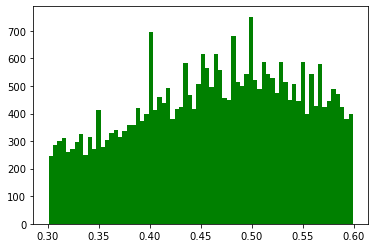

In [13]:
plt.hist(bv_filtro, bins=70, color="green")

In [14]:
data_new.insert(loc=5, column='Distancia', value='')
data_new['Distancia'] = (1/(data_new['Plx']*10**-3))

In [15]:
data_new.insert(loc=3, column='MagAbs', value='')
data_new['MagAbs'] = (data_new.Vmag - 5 * numpy.log10(data_new.Distancia) + 5)
data_new

/home/yahira_m/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,HIP,RAhms,DEdms,MagAbs,Vmag,Plx,Distancia,SpType,BV
0,1,00 00 00.22,+01 05 20.4,1.845016,9.10,3.54,282.485876,F5,0.482
1,2,00 00 00.91,-19 29 55.8,5.972221,9.27,21.90,45.662100,K3V,0.999
2,3,00 00 01.20,+38 51 33.4,-1.146468,6.61,2.81,355.871886,B9,-0.019
3,4,00 00 02.01,-51 53 36.8,2.506509,8.06,7.75,129.032258,F0V,0.370
4,5,00 00 02.39,-40 35 28.4,0.839409,8.55,2.87,348.432056,G8III,0.902
...,...,...,...,...,...,...,...,...,...
118213,118318,23 59 51.30,+11 40 25.4,-1.593494,6.99,1.92,520.833333,K2,1.595
118214,118319,23 59 53.74,-22 25 41.4,3.362666,8.23,10.63,94.073377,G2V,0.639
118215,118320,23 59 54.25,+05 57 23.9,1.084850,7.59,5.00,200.000000,K0,0.999
118216,118321,23 59 54.78,-64 22 21.3,5.618767,9.20,19.22,52.029136,G5V,0.698


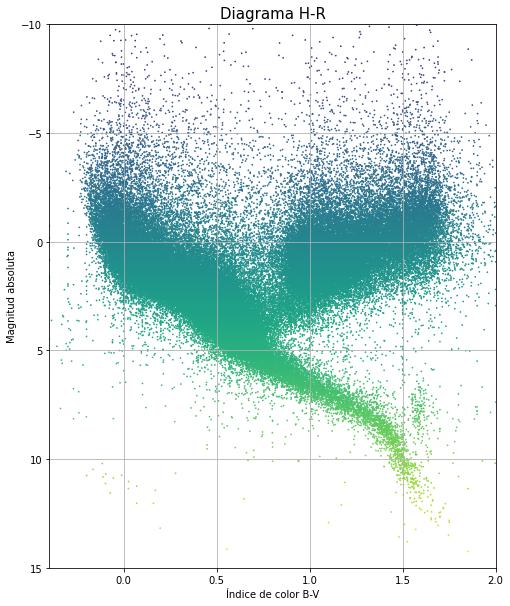

In [17]:
fig, ax = plt.subplots(figsize=(8,10))
ax.set_xlim(-0.4, 2)
ax.set_ylim(15, -10)
ax.grid()
ax.set_title('Diagrama H-R')
ax.title.set_fontsize(15)
ax.set_xlabel('Índice de color B-V')
ax.set_ylabel('Magnitud absoluta')
plt.scatter(data_new['BV'], data_new['MagAbs'],s=0.5, c=data_new['MagAbs'])
plt.savefig('HR.png', bbox_inches='tight')